In [1]:
%matplotlib inline 

from lattice_generation import GeneratedLatticeImage

## Generate Data

Specify parameters to generate data:

In [2]:
N = 5 #Number of lattice sites along each axis
M = 10 #Number of pixels per lattice site
N_atom = 12 #Number of atoms to be randomly placed
N_photon = 100 #Number of photons atoms fluoresce
std = 1 #Width of the normal distribution that counts are sampled from
N_backg = 300 #Number of samples drawn from the Poisson distribution for the background noise
lam_backg = 1 #Expectation interval of the Poisson dark count event

Generate the data with specified parameters

In [3]:
lattice_image = GeneratedLatticeImage(
    N=N,
    M=M,
    N_atom=N_atom,
    N_photon=N_photon,
    std=std,
    N_backg=N_backg, 
    lam_backg=lam_backg
)

Visualize the generated data

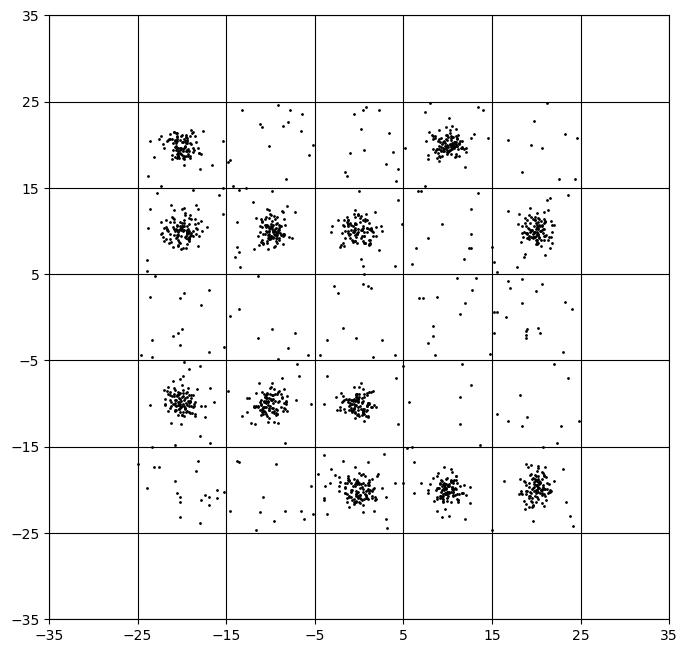

In [4]:
lattice_image.plot()

Generated data also gives the actual, binary distribution of atoms on the lattice

In [5]:
lattice_image.actual_lattice

array([[1., 0., 0., 1., 0.],
       [1., 1., 1., 0., 1.],
       [0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1.]])

## Analysis Part

In [6]:
from analysis_models import mixture_model_v0
from lattice_analyser import LatticeImageAnalyzer

Specify the model for the analysis, analyze the data with that model given the generated data results

In [7]:
# Instanciate the Analyser with the lattice_image object created above
P = LatticeImageAnalyzer(lattice_image)

# Choose analysis function
analysis_function = mixture_model_v0

# Run analysis
P.run_analysis(
    analysis_function=analysis_function
)

logp = -362.59, ||grad|| = 30.453: 100%|███████████████████████████████████████████████| 9/9 [00:00<00:00, 1511.10it/s]
logp = -73.676, ||grad|| = 0.0012705: 100%|██████████████████████████████████████████| 15/15 [00:00<00:00, 3759.68it/s]
logp = -68.246, ||grad|| = 4.3702: 100%|█████████████████████████████████████████████| 11/11 [00:00<00:00, 5610.77it/s]
logp = -393.04, ||grad|| = 30.697: 100%|███████████████████████████████████████████████| 9/9 [00:00<00:00, 3006.67it/s]
logp = -47.32, ||grad|| = 2.7648: 100%|████████████████████████████████████████████████| 8/8 [00:00<00:00, 2675.37it/s]
logp = -421.03, ||grad|| = 25.629: 100%|███████████████████████████████████████████████| 8/8 [00:00<00:00, 4007.46it/s]
logp = -384.54, ||grad|| = 28.545: 100%|███████████████████████████████████████████████| 8/8 [00:00<00:00, 4009.85it/s]
logp = -392.9, ||grad|| = 26.455: 100%|████████████████████████████████████████████████| 9/9 [00:00<00:00, 3032.76it/s]
logp = -59.87, ||grad|| = 0.0033932: 100

The model yields the probability that each lattice site is occupied by an atom

In [8]:
P.print_occupation()

[[92.5  0.8  6.5 90.1 14.4]
 [86.2 87.6 90.7  0.  90.1]
 [ 0.   0.   0.   0.   0.4]
 [88.5 91.1 94.1  0.   0. ]
 [13.5  0.  81.5 91.6 90.9]]


Compare this result with the actual distribution of atoms

In [9]:
lattice_image.actual_lattice

array([[1., 0., 0., 1., 0.],
       [1., 1., 1., 0., 1.],
       [0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1.]])

# Analysis of the Real Data with Deconvolution

Raw data consists of 6 lattice shots and a PSF. Data is collected with a high-resolution objective and an EMCDD camera. Analysis starts with selecting a region of interest. Then image is rotated such that the lattice is oriented vertically. Then Wiener-Hunt deconvolution is performed given the point-spread function. After this the deconvoluted image is shifted such that atom centers match the lattice locations of the lattice. Finally, photon counts on lattice sites are histogrammed and a threshold is calculated. With this threshold the deconvoluted image is binarized and the occupation numbers on each lattice is found.

## Wiener-Hunt Deconvolution (source: Wikipedia)

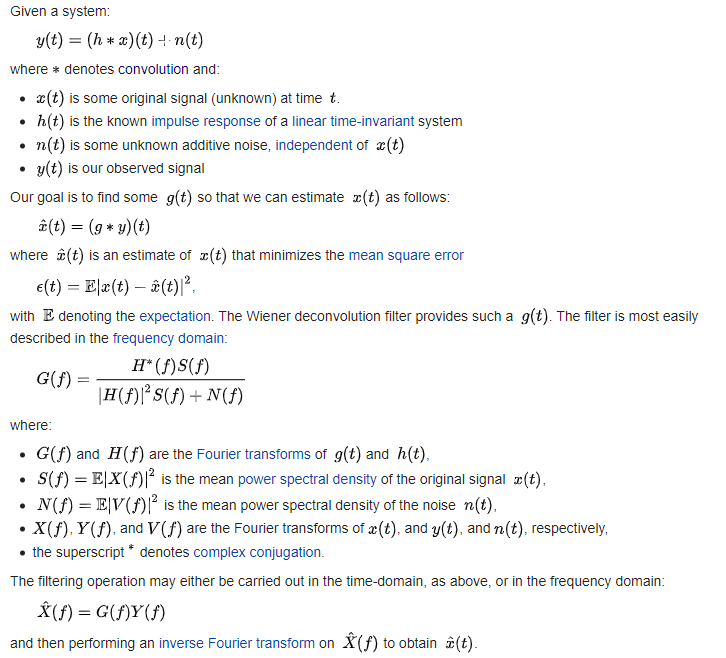

In [1]:
from deconvolution_analysis import LatticeImageAnalyzer 

Paths for the raw data is assigned, the shot to be analyzed is specified:

In [2]:
raw_image_path = 'Scan-20200201-0006.hdf'
psf_path = '20191216-0030.pkl'
shot_number = 4

Anaysis parameters:

In [3]:
M = 10 #Number of pixels per lattice site
angle = 47.5 #Angle by which the raw image is rotated
roi = [650, 1050, 720, 1120] #[x1,x2,y1,y2] Region of interest of the raw image
shift_up = 5 #Number of pixels by which the deconvolved image is shifted up such that atom locations match the lattice sites
shift_left = 0 #Number of pixels by which the deconvolved image is shifted left such that atom locations match the lattice sites
threshold_buffer = 0.5 #Threshold buffer to be added to the calculated threshold for binarizing the deconvolved image

In [4]:
single_site_image = LatticeImageAnalyzer(
    raw_image_path = raw_image_path,
    shot_number = shot_number,
    psf_path = psf_path,
    M=M,
    angle=angle,
    roi=roi,
    shift_up=shift_up,
    shift_left=shift_left, 
    threshold_buffer=threshold_buffer
)

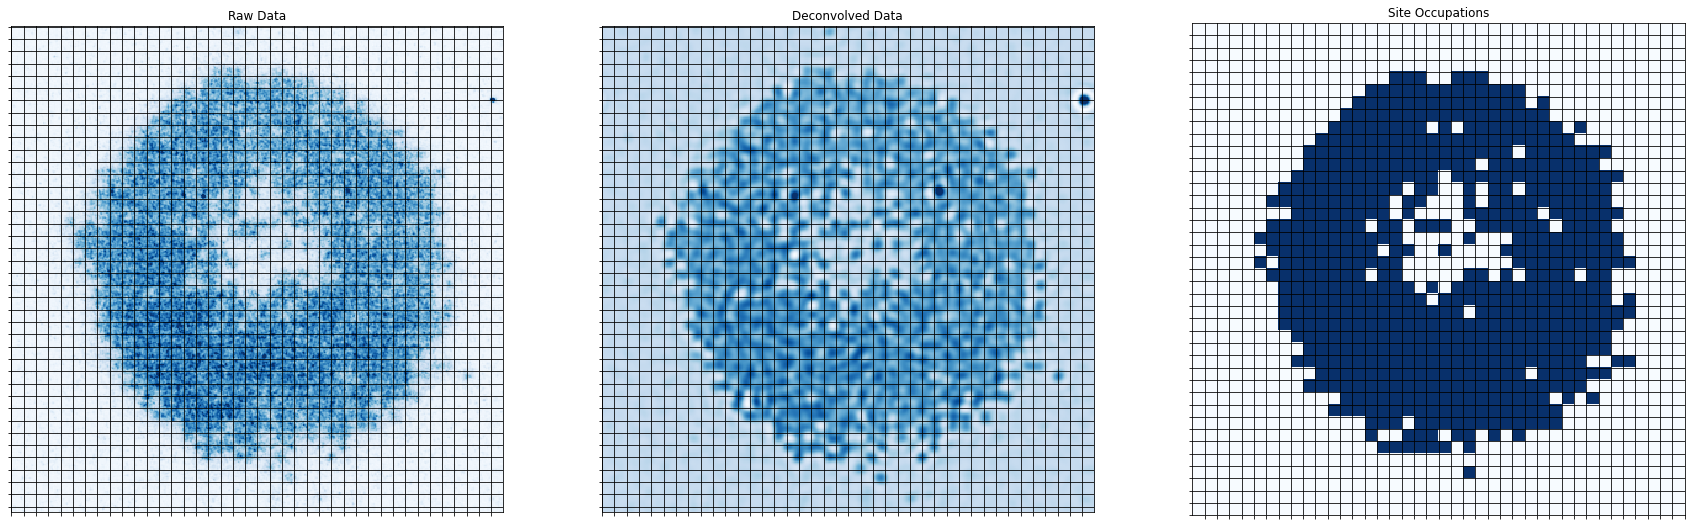

In [5]:
binarized = single_site_image.analyze_raw_data(plot=True, plot_hist=False) 